# UNEMPLOYEMENT ANALYSIS  with PYTHON 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# URL of the file with ?raw=true to download the raw file content
path = "https://github.com/preethiakshai/CBTC/blob/main/Unemployment%20in%20India.xlsx?raw=true"
un_emp_data = pd.read_excel(path, engine='openpyxl')
un_emp_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
print("Number of Rows:",un_emp_data.shape[0])
print("Number of coloums:",un_emp_data.shape[1])


Number of Rows: 754
Number of coloums: 7


In [4]:
un_emp_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
un_emp_data.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [6]:
un_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(un_emp_data.isnull().sum())



Missing values in the dataset:
Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


In [8]:
# Display rows with missing values
print("\nRows with missing values:")
print(un_emp_data[un_emp_data.isnull().any(axis=1)])


Rows with missing values:
    Region Date Frequency  Estimated Unemployment Rate (%)  \
359    NaN  NaN       NaN                              NaN   
360    NaN  NaN       NaN                              NaN   
361    NaN  NaN       NaN                              NaN   
362    NaN  NaN       NaN                              NaN   
363    NaN  NaN       NaN                              NaN   
364    NaN  NaN       NaN                              NaN   
365    NaN  NaN       NaN                              NaN   
366    NaN  NaN       NaN                              NaN   
367    NaN  NaN       NaN                              NaN   
368    NaN  NaN       NaN                              NaN   
369    NaN  NaN       NaN                              NaN   
370    NaN  NaN       NaN                              NaN   
371    NaN  NaN       NaN                              NaN   
372    NaN  NaN       NaN                              NaN   

     Estimated Employed  Estimated Labour 

In [9]:
# Drop rows with missing values
cleaned_data = un_emp_data.dropna()


In [10]:
# check for null value
cleaned_data.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [11]:
#shape of Cleaned data
print("Number of Rows:",cleaned_data.shape[0])
print("Number of coloums:",cleaned_data.shape[1])

Number of Rows: 740
Number of coloums: 7


In [12]:
# Convert the 'Date' column to datetime, considering the format with hyphens
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%d-%m-%Y')

In [13]:
# Set the 'Date' column as the index
cleaned_data.set_index('Date', inplace=True)


In [14]:
# Calculate the total labor force using the formula
cleaned_data['Estimated Labour Force'] = cleaned_data['Estimated Employed'] / (1 - (cleaned_data['Estimated Unemployment Rate (%)'] / 100))

In [15]:
# Calculate the number of unemployed people
cleaned_data['Unemployed'] = cleaned_data['Estimated Labour Force'] - cleaned_data['Estimated Employed']

In [16]:
# Group by 'Region' and calculate mean unemployment rate and labor participation rate
region_summary = cleaned_data.groupby('Region').agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

In [17]:
print("\nRegional Summary:")
print(region_summary)


Regional Summary:
              Region  Estimated Unemployment Rate (%)  \
0     Andhra Pradesh                         7.477143   
1              Assam                         6.428077   
2              Bihar                        18.918214   
3         Chandigarh                        15.991667   
4       Chhattisgarh                         9.240357   
5              Delhi                        16.495357   
6                Goa                         9.274167   
7            Gujarat                         6.663929   
8            Haryana                        26.283214   
9   Himachal Pradesh                        18.540357   
10   Jammu & Kashmir                        16.188571   
11         Jharkhand                        20.585000   
12         Karnataka                         6.676071   
13            Kerala                        10.123929   
14    Madhya Pradesh                         7.406429   
15       Maharashtra                         7.557500   
16         M

In [18]:
# Plot Unemployment Rate and Labour Participation Rate over time for a specific region
def plot_region_trends(region_name):
    region_data = cleaned_data[cleaned_data['Region'] == region_name]
    plt.figure(figsize=(14, 7))
    # Plot Unemployment Rate
    plt.subplot(2, 1, 1)
    sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=region_data, marker='o')
    plt.title(f'Unemployment Rate in {region_name}')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)

    # Plot Labour Participation Rate
    plt.subplot(2, 1, 2)
    sns.lineplot(x='Date', y='Estimated Labour Participation Rate (%)', data=region_data, marker='o', color='orange')
    plt.title(f'Labour Participation Rate in {region_name}')
    plt.xlabel('Date')
    plt.ylabel('Labour Participation Rate (%)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Enter the specific regione to Plot trends Tripura


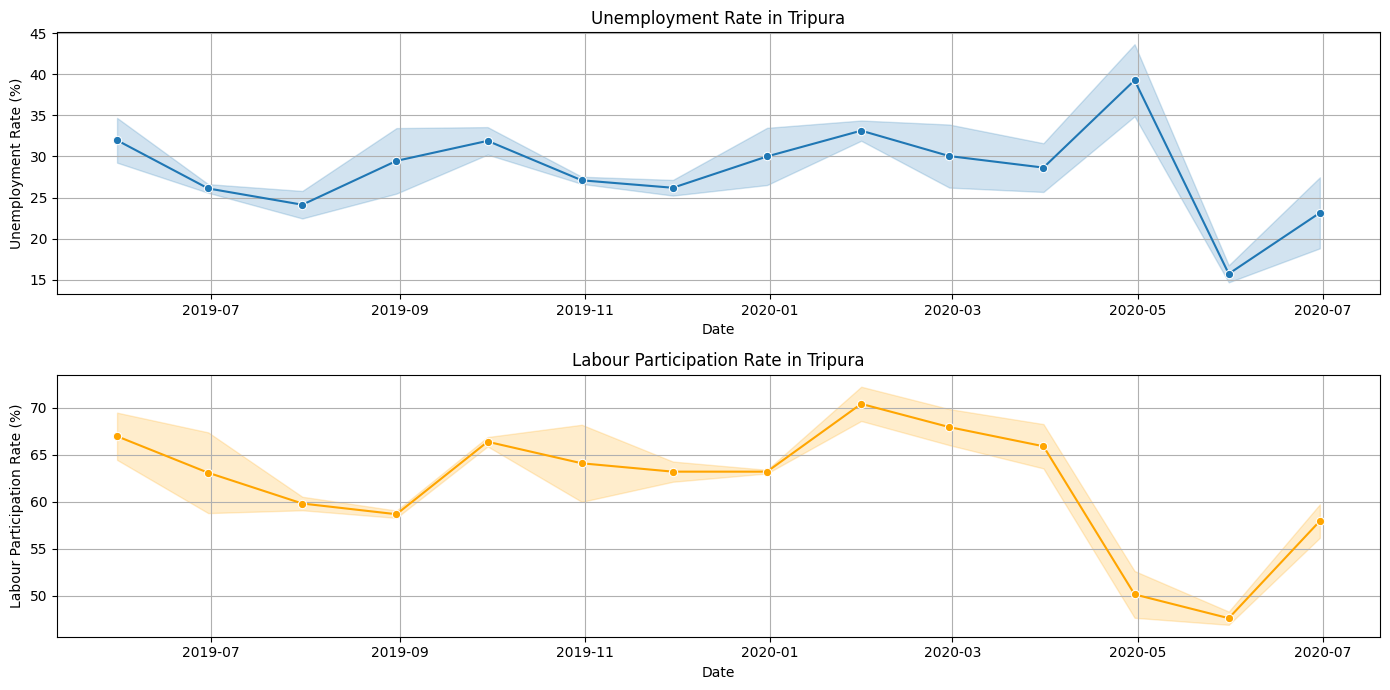

In [19]:
# Example: Plot trends for a specific regione 
region=input("Enter the specific regione to Plot trends ")
plot_region_trends(region)

In [20]:
# Correlation between Unemployment Rate and Labour Participation Rate
correlation = cleaned_data[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']].corr()
print("\nCorrelation between Unemployment Rate and Labour Participation Rate:")
print(correlation)


Correlation between Unemployment Rate and Labour Participation Rate:
                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Labour Participation Rate (%)                                 1.000000  


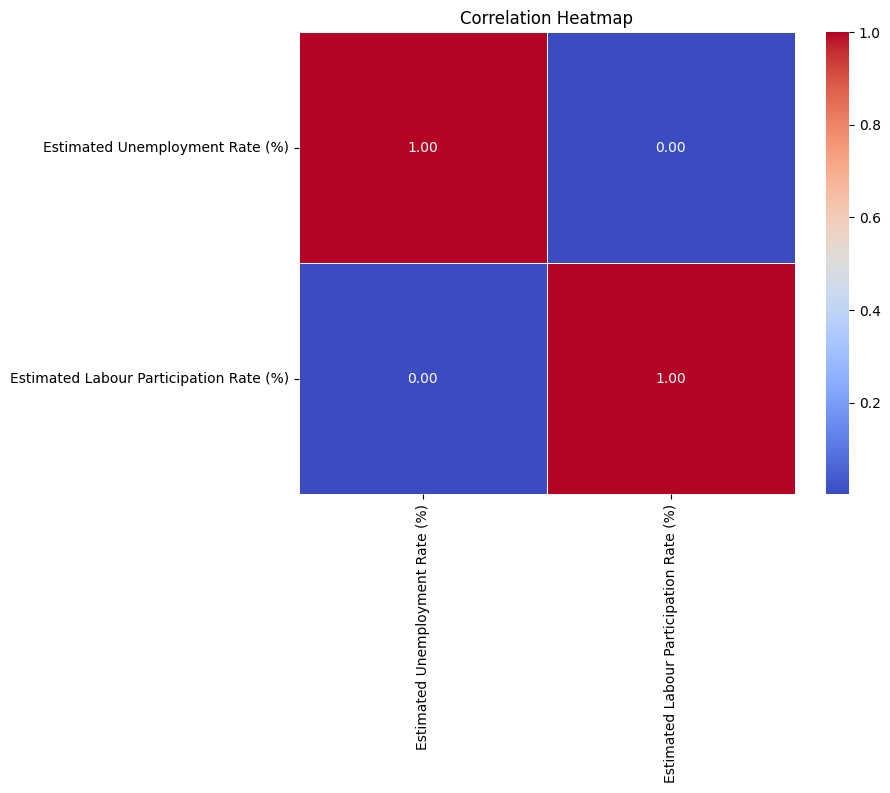

In [21]:
# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

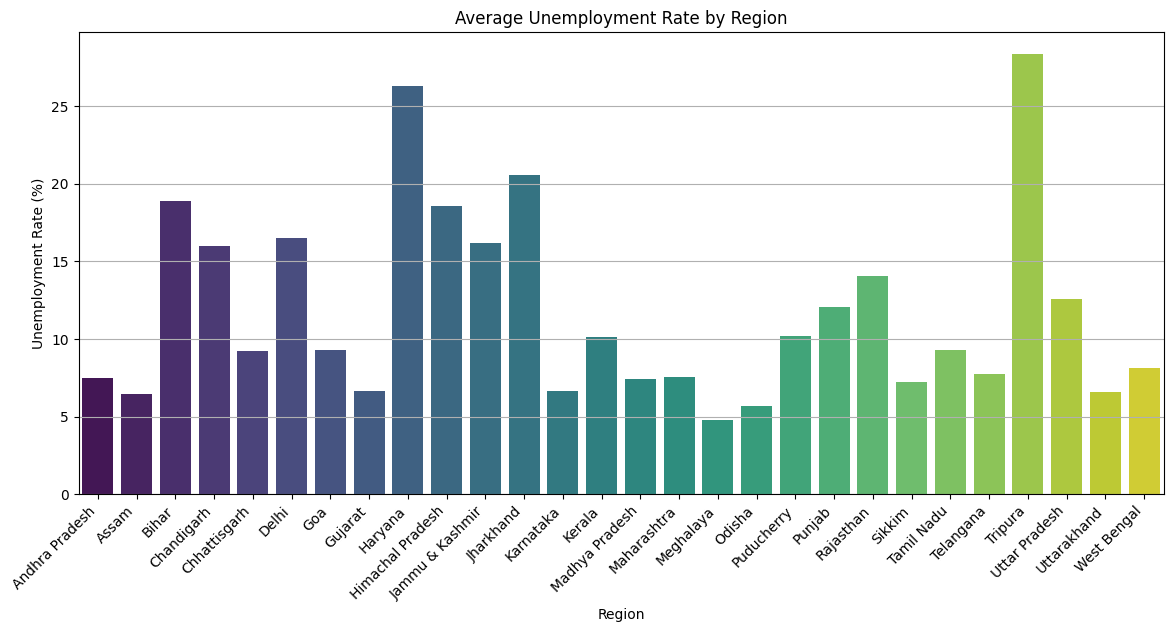

In [22]:
# Plot average Unemployment Rate by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=region_summary, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')


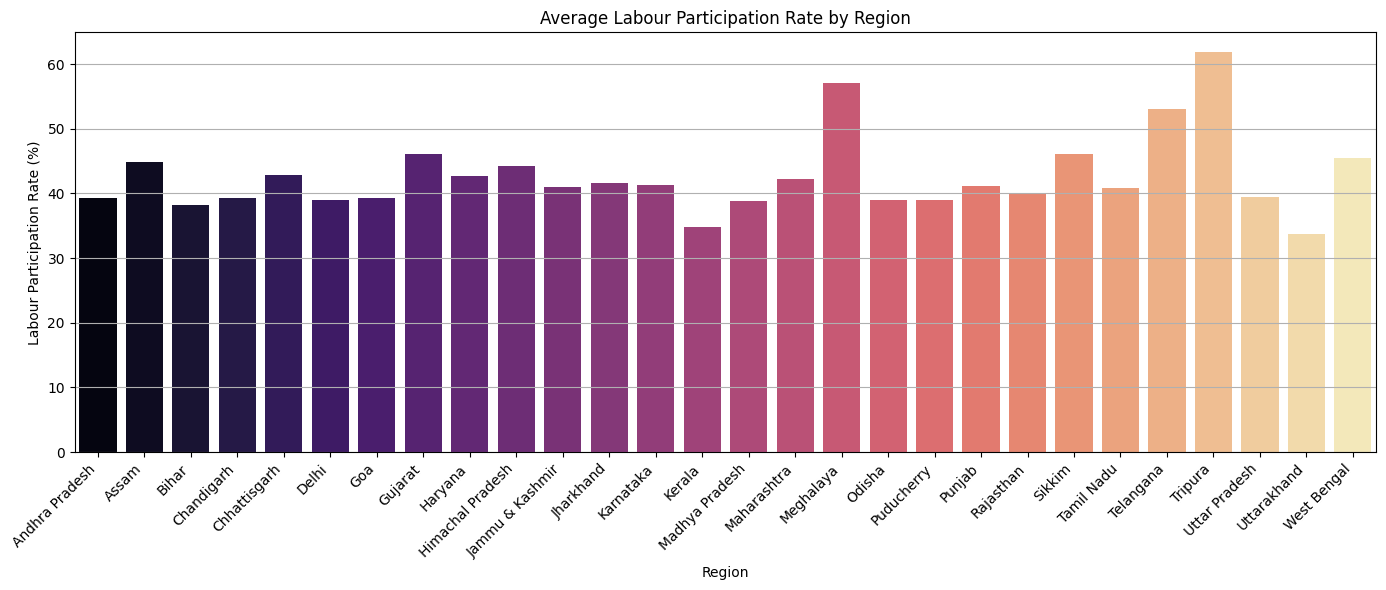

In [23]:
# Plot average Labour Participation Rate by Region
plt.figure(figsize=(14,6))
sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data=region_summary, palette='magma')
plt.title('Average Labour Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


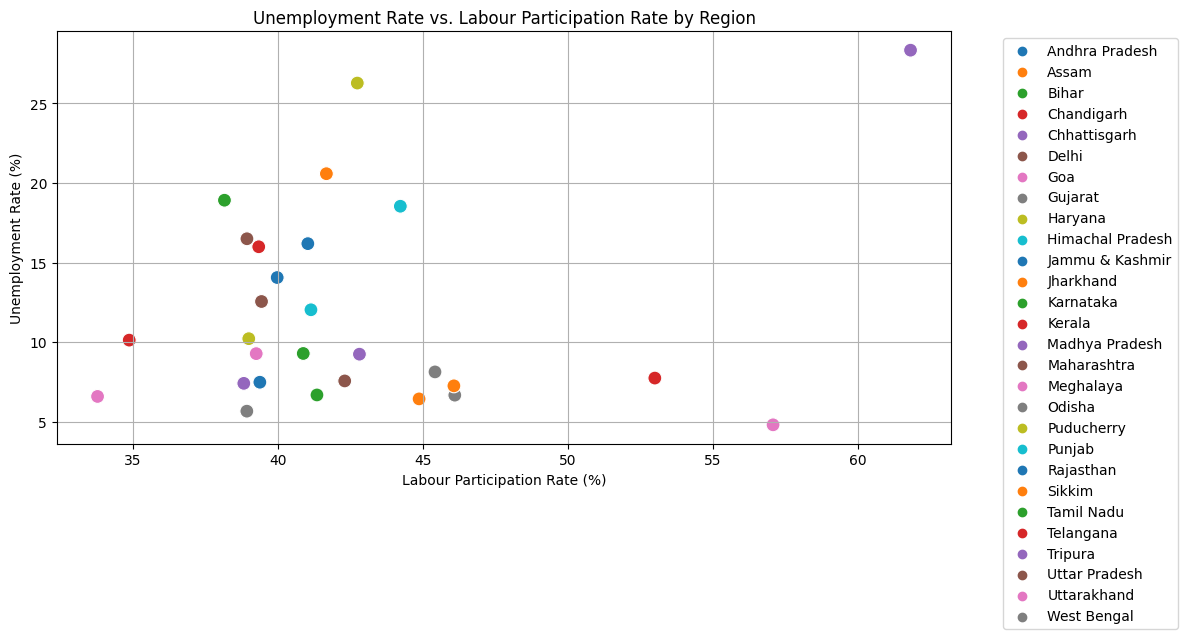

In [24]:
# Scatter Plot of Unemployment Rate vs. Labour Participation Rate by Region
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', 
                hue='Region', data=region_summary, palette='tab10', s=100)
plt.title('Unemployment Rate vs. Labour Participation Rate by Region')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

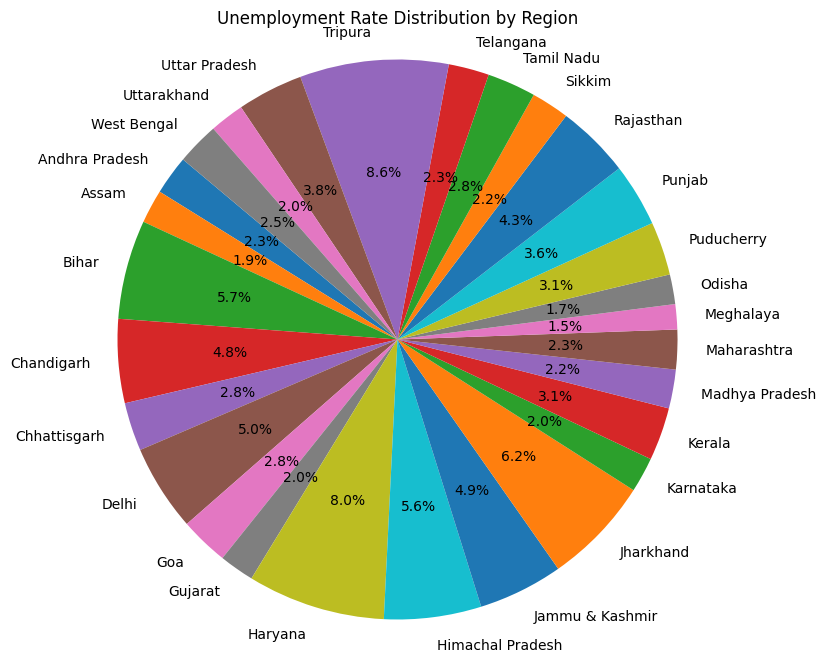

In [25]:
# Pie Chart of Unemployment Rate by Region
plt.figure(figsize=(10, 8))
region_unemployment = region_summary.set_index('Region')['Estimated Unemployment Rate (%)']
plt.pie(region_unemployment, labels=region_unemployment.index, autopct='%1.1f%%', colors=sns.color_palette('tab10'), startangle=140)
plt.title('Unemployment Rate Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


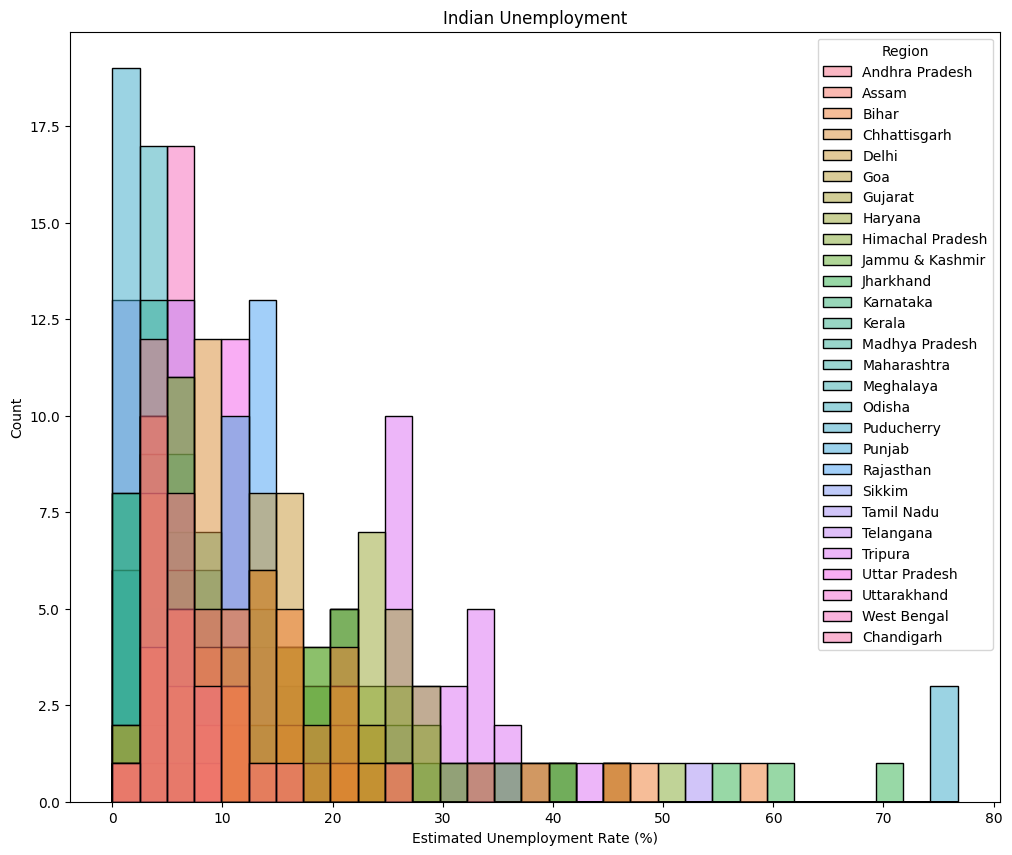

In [30]:
# Plot the histogram
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate (%)", hue="Region", data=cleaned_data)
plt.show()

In [37]:
import plotly.express as px
unemployment = cleaned_data[["Region", "Area", "Estimated Unemployment Rate (%)"]]  # Adjust column names as needed

# Create the sunburst chart
figure = px.sunburst(
    unemployment, 
    path=["Area", "Region"], 
    values="Estimated Unemployment Rate (%)", 
    width=700, height=700, 
    color_continuous_scale="RdYlGn", 
    title="Unemployment Rate in India"
)

figure.show()

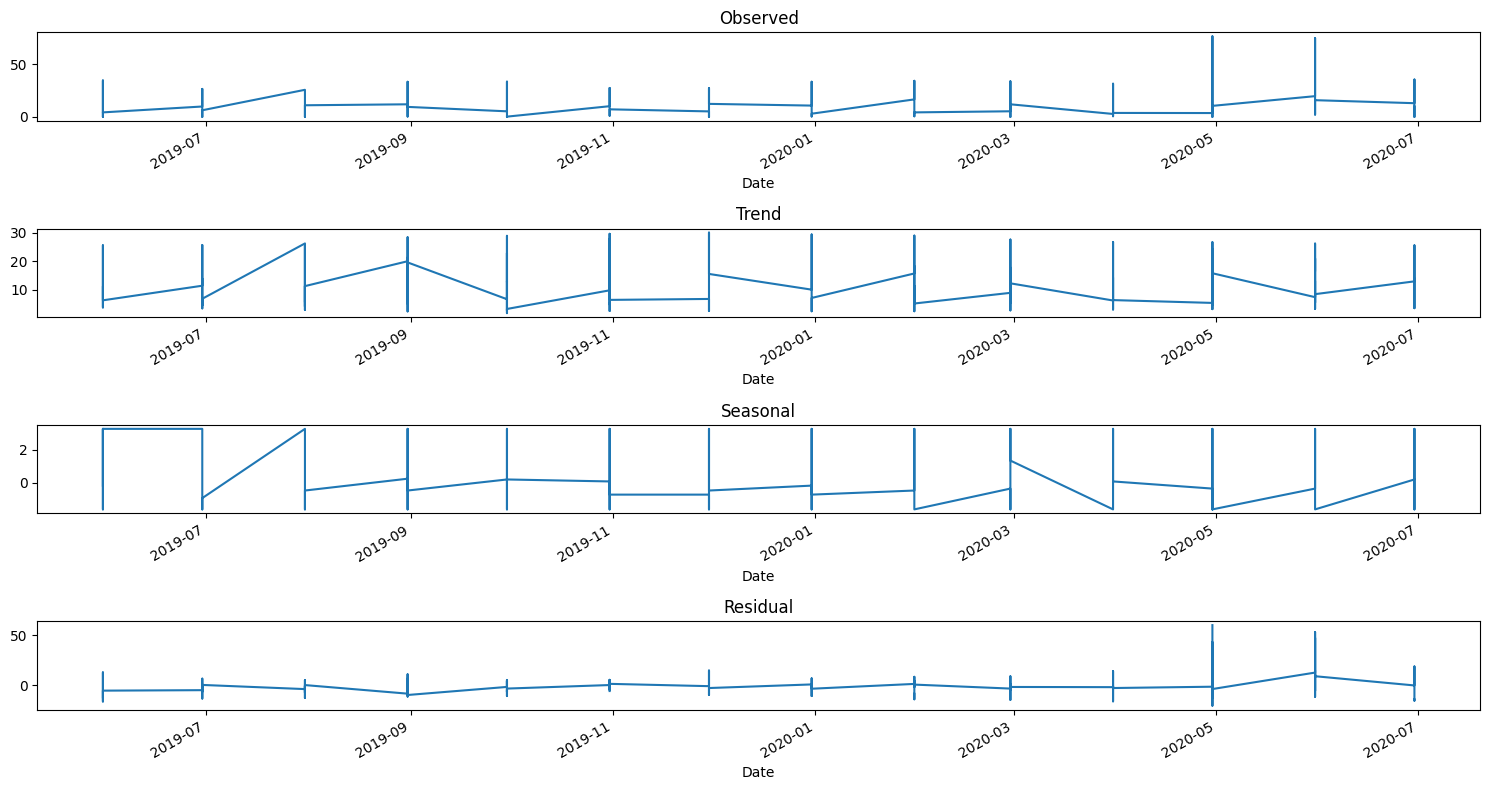

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume monthly data; period is 12 months
period = 12

# Perform seasonal decomposition
decomposition = seasonal_decompose(cleaned_data['Estimated Unemployment Rate (%)'], model='additive', period=period)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()



In [44]:
# Summary of the findings
print("\nSummary of the findings:")
print("1. The unemployment rate shows a significant increase during the COVID-19 period.")
print("2. Seasonal decomposition reveals the underlying trend and seasonality in the data.")


Summary of the findings:
1. The unemployment rate shows a significant increase during the COVID-19 period.
2. Seasonal decomposition reveals the underlying trend and seasonality in the data.
